In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def predict(x, w, b):
  return w * x + b

In [58]:
def avg_loss(x, y, w, b):
    y_pred = predict(x, w, b)
    return np.mean((y - y_pred) ** 2)  # Vectorized MSE calculation

In [59]:
def update_w_and_b(x, y, w, b, alpha):
    n = len(x)
    
    # Vectorized gradient computation
    y_pred = predict(x, w, b)
    error = y - y_pred
    
    dl_dw = (-2 / n) * np.dot(x, error)  # Equivalent to sum(-2 * x * (y - y_pred)) / n
    dl_db = (-2 / n) * np.sum(error)     # Equivalent to sum(-2 * (y - y_pred)) / n
    
    # Update weights
    w -= alpha * dl_dw
    b -= alpha * dl_db
    
    return w, b

In [49]:
def train(x, y, w, b, alpha, epochs):
  for epoch in range(epochs):
    w, b = update_w_and_b(x, y, w, b, alpha)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch}, Loss: {avg_loss(x, y, w, b)}")
  return w, b

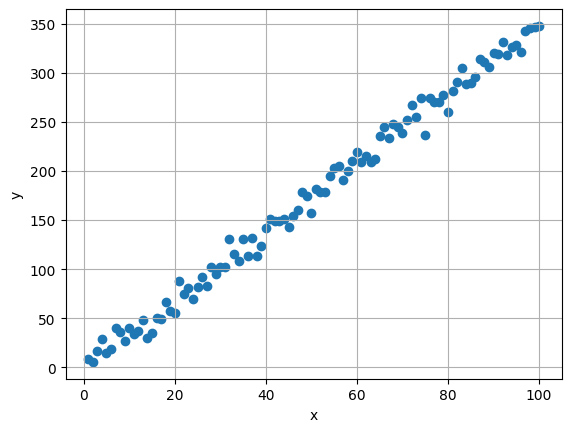

In [35]:
np.random.seed(42)

x = np.arange(1, 101)
y = 3.5 * x + np.random.normal(0, 10, size=len(x))

plt.figure()
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [64]:
w, b = train(x, y, 0.0, 0.0, 0.00001, 150)
x_new = 145
y_new = predict(x_new, w, b)
print(y_new)

Epoch: 0, Loss: 35861.17742345436
Epoch: 10, Loss: 8890.33045902777
Epoch: 20, Loss: 2250.6479084764237
Epoch: 30, Loss: 616.090950500409
Epoch: 40, Loss: 213.69569696886728
Epoch: 50, Loss: 114.63398379314093
Epoch: 60, Loss: 90.24691468262415
Epoch: 70, Loss: 84.24324775390713
Epoch: 80, Loss: 82.76520636159955
Epoch: 90, Loss: 82.40128336661084
Epoch: 100, Loss: 82.31163401910163
Epoch: 110, Loss: 82.28950535767515
Epoch: 120, Loss: 82.28399894300081
Epoch: 130, Loss: 82.28258459844237
Epoch: 140, Loss: 82.28217764540011
505.67700781117236


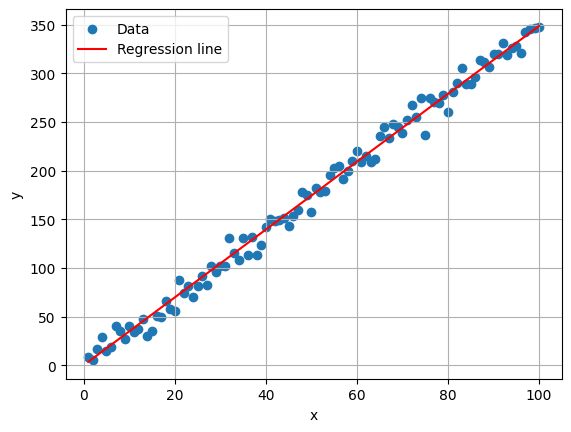

In [65]:
plt.figure()
plt.scatter(x, y, label="Data")
plt.plot(x, predict(x, w, b), c='red', label="Regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()